Credit Card Fraud Detection
=

**Project ID** - #CC69844
  **Project Level** - Intermediate Level




### Import Libraries
Start by importing essential libraries for data analysis, visualization, and machine learning:
- **NumPy**: Numerical operations.
- **Pandas**: Data manipulation.
- **Matplotlib/Seaborn**: Data visualization.
- **Scikit-learn**: Machine learning algorithms.
- **XGBoost**: XGBoost classifier.
- **Warnings**: Ignore warning messages.

### Basic EDA (Exploratory Data Analysis)
Explore the dataset to understand its structure:
- **Descriptive Statistics**: Summarize features like mean and median.
- **Data Types**: Check column data types.

### Data Visualization
Create visualizations to identify patterns:
- **Histograms**: Distribution of numerical data.
- **Box Plots**: Detect outliers.
- **Scatter Plots**: Relationships between variables.
- **Heatmaps**: Correlation between variables.

### Data Preprocessing
Prepare the data for modeling:
- **Missing Data**: Detect and handle missing values.
- **Duplicate Data**: Remove duplicates.
- **Outliers**: Identify and handle outliers.
- **Scaling**: Normalize features using `StandardScaler` or `MinMaxScaler`.

### Split Data
Separate the dataset into features (independent variables) and target (dependent variable), then split into training and testing sets.

### Model Building
Build and evaluate machine learning models:
- **Model Selection**: Choose models like Logistic Regression, Decision Tree, Random Forest, and XGBoost.
- **Model Evaluation**: Use metrics like accuracy, confusion matrix, and classification report.
- **Hyperparameter Tuning**: Optimize models using `GridSearchCV` or `RandomizedSearchCV`.

Importing Necessary Libraries
-

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

Importing Dataset
-

In [2]:
df = pd.read_csv('credit_dataset.csv')
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


Exploratory Data Analysis (EDA)
-

In [3]:
df.info

<bound method DataFrame.info of        Unnamed: 0       ID GENDER CAR REALITY  NO_OF_CHILD    INCOME  \
0               0  5008806      M   Y       Y            0  112500.0   
1               1  5008808      F   N       Y            0  270000.0   
2               2  5008809      F   N       Y            0  270000.0   
3               3  5008810      F   N       Y            0  270000.0   
4               4  5008811      F   N       Y            0  270000.0   
...           ...      ...    ...  ..     ...          ...       ...   
25129       25129  5149828      M   Y       Y            0  315000.0   
25130       25130  5149834      F   N       Y            0  157500.0   
25131       25131  5149838      F   N       Y            0  157500.0   
25132       25132  5150049      F   N       Y            0  283500.0   
25133       25133  5150337      M   N       Y            0  112500.0   

                INCOME_TYPE                 EDUCATION_TYPE  \
0                   Working  Secondary / 

In [4]:
df.shape

(25134, 20)

In [5]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0       ID GENDER CAR REALITY  NO_OF_CHILD    INCOME  \
0               0  5008806      M   Y       Y            0  112500.0   
1               1  5008808      F   N       Y            0  270000.0   
2               2  5008809      F   N       Y            0  270000.0   
3               3  5008810      F   N       Y            0  270000.0   
4               4  5008811      F   N       Y            0  270000.0   
...           ...      ...    ...  ..     ...          ...       ...   
25129       25129  5149828      M   Y       Y            0  315000.0   
25130       25130  5149834      F   N       Y            0  157500.0   
25131       25131  5149838      F   N       Y            0  157500.0   
25132       25132  5150049      F   N       Y            0  283500.0   
25133       25133  5150337      M   N       Y            0  112500.0   

                INCOME_TYPE                 EDUCATION_TYPE  \
0                   Working  Secondary 

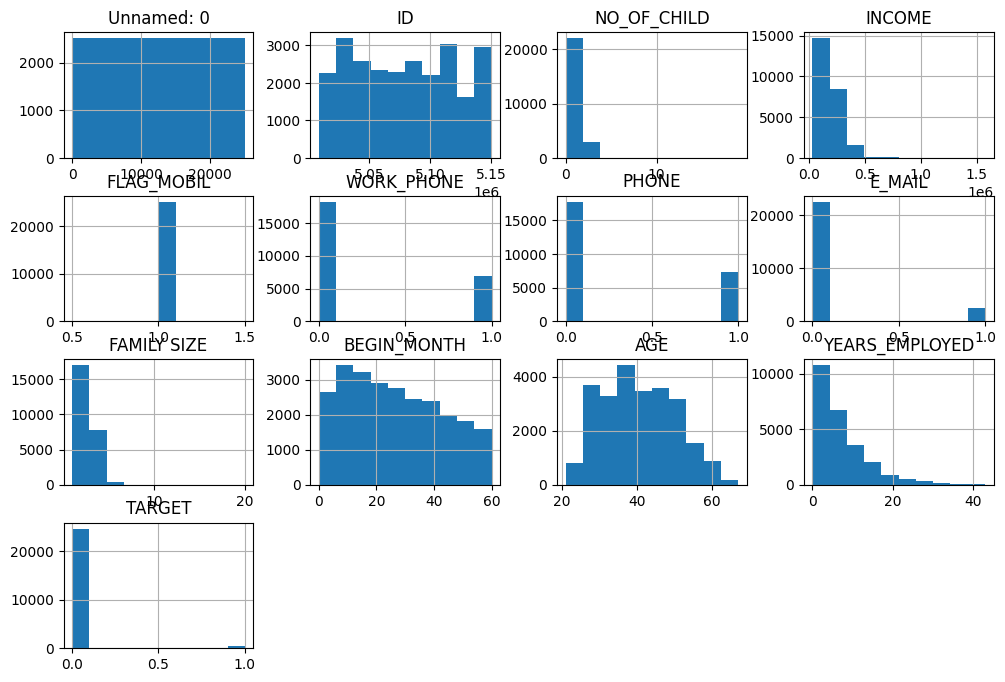

In [6]:
df.hist(figsize=(12, 8))
plt.show()

Missing data
-

In [7]:
df.isna().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

Duplicated Data
-

In [8]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
25129    False
25130    False
25131    False
25132    False
25133    False
Length: 25134, dtype: bool>

In [9]:
df.columns.tolist()

['Unnamed: 0',
 'ID',
 'GENDER',
 'CAR',
 'REALITY',
 'NO_OF_CHILD',
 'INCOME',
 'INCOME_TYPE',
 'EDUCATION_TYPE',
 'FAMILY_TYPE',
 'HOUSE_TYPE',
 'FLAG_MOBIL',
 'WORK_PHONE',
 'PHONE',
 'E_MAIL',
 'FAMILY SIZE',
 'BEGIN_MONTH',
 'AGE',
 'YEARS_EMPLOYED',
 'TARGET']

Data vizulization
-

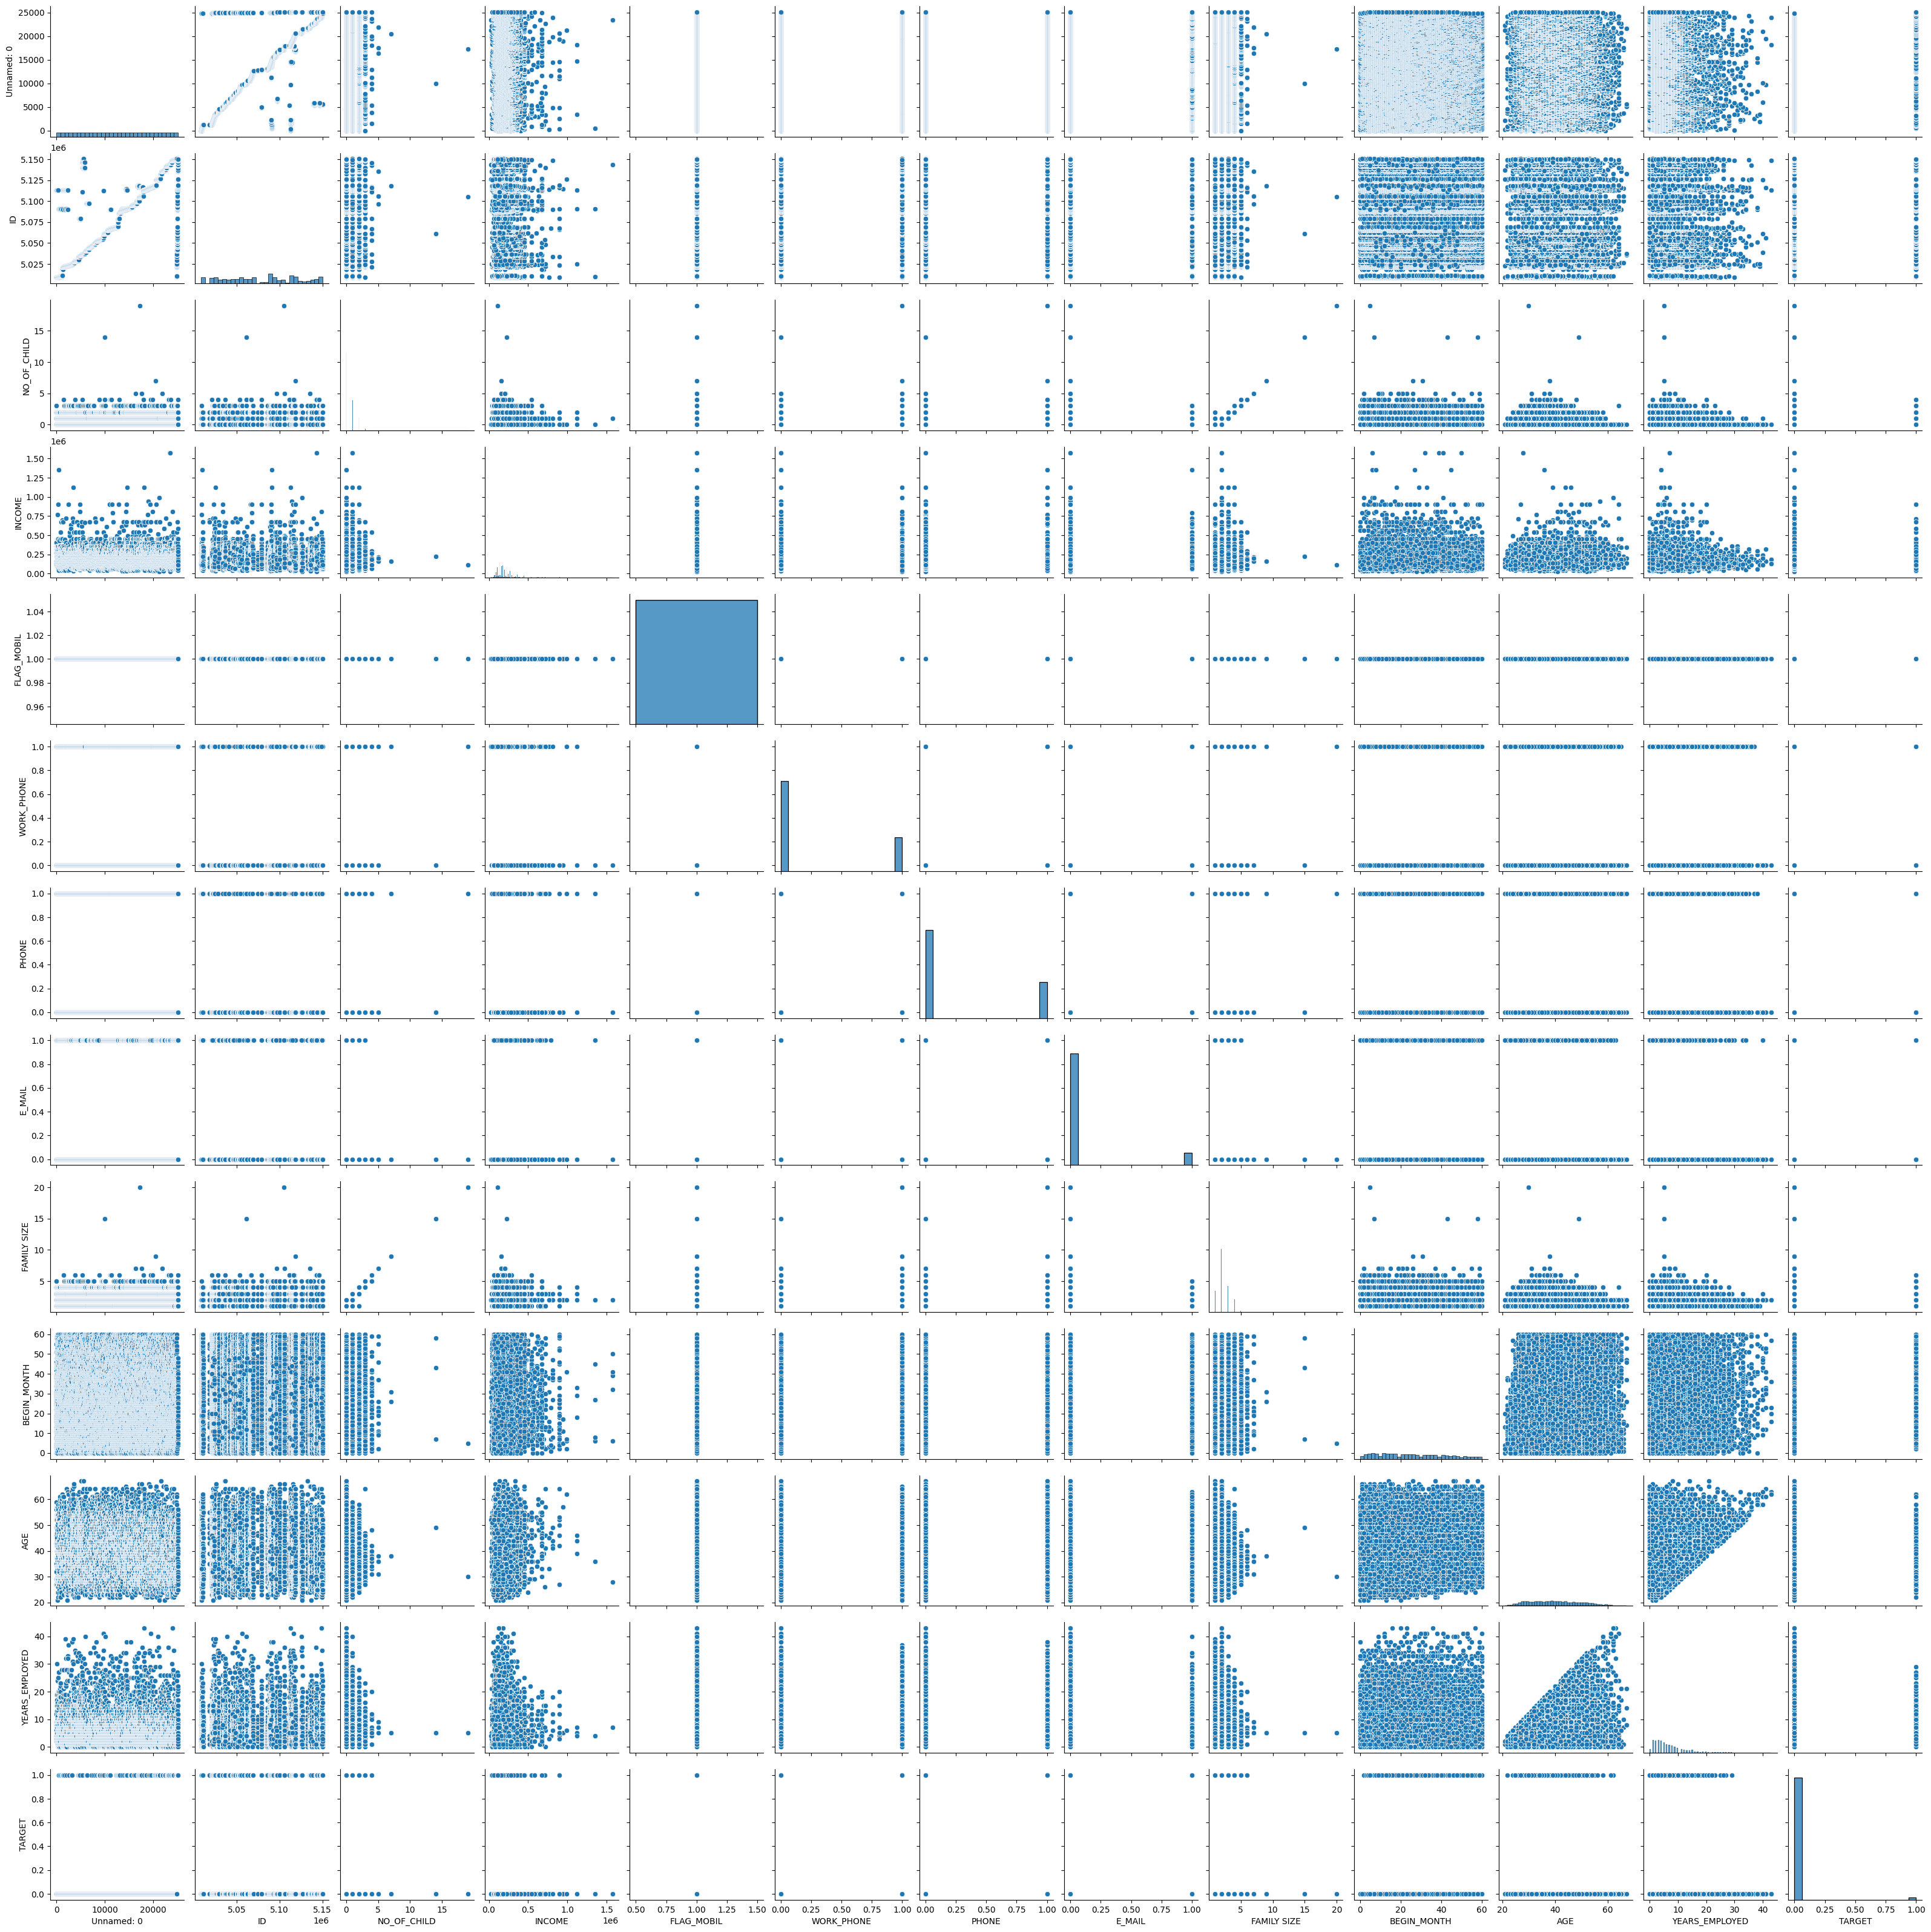

In [10]:
sns.pairplot(df)
plt.show()

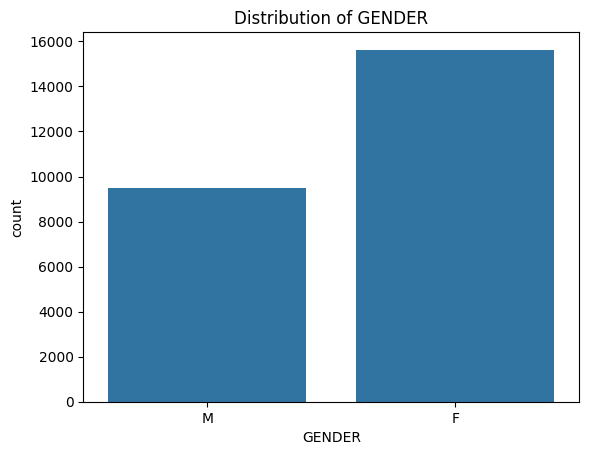

In [11]:
sns.countplot(x='GENDER', data=df)
plt.title('Distribution of GENDER')
plt.show()

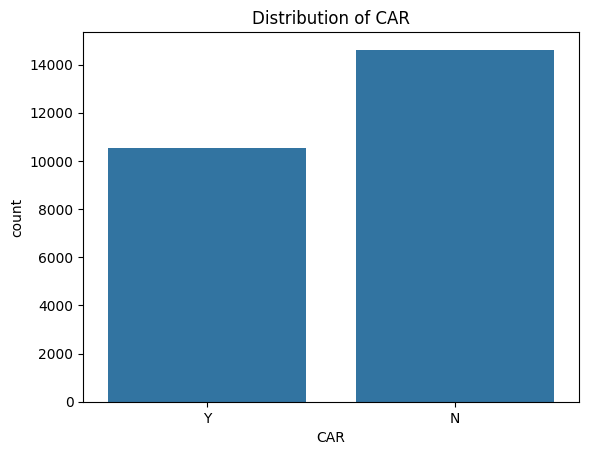

In [12]:
sns.countplot(x='CAR', data=df)
plt.title('Distribution of CAR')
plt.show()

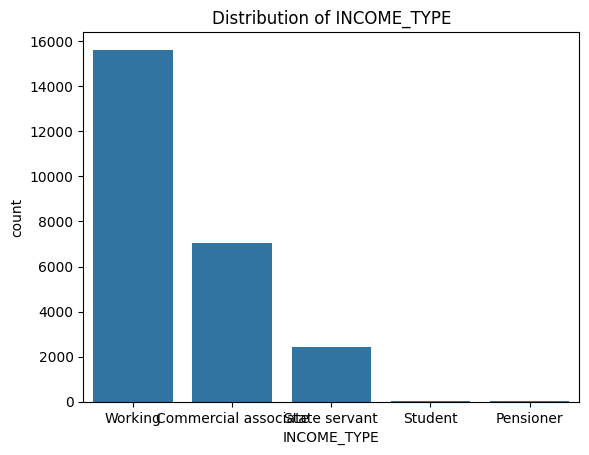

In [13]:
sns.countplot(x='INCOME_TYPE', data=df)
plt.title('Distribution of INCOME_TYPE')
plt.show()

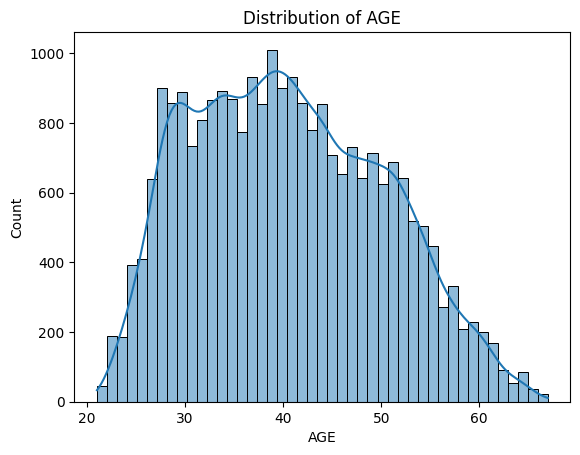

In [14]:
# For AGE
sns.histplot(data=df, x='AGE', kde=True)
plt.title('Distribution of AGE')
plt.show()

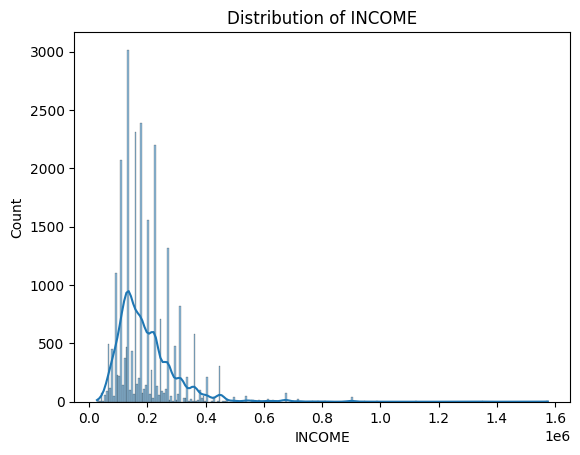

In [15]:
# For INCOME
sns.histplot(data=df, x='INCOME', kde=True)
plt.title('Distribution of INCOME')
plt.show()

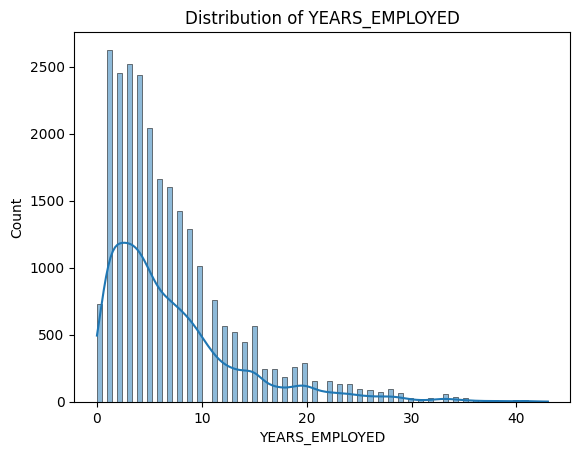

In [16]:
# Distribution of for YEARS_EMPLOYED
sns.histplot(data=df, x='YEARS_EMPLOYED', kde=True)
plt.title('Distribution of YEARS_EMPLOYED')
plt.show()

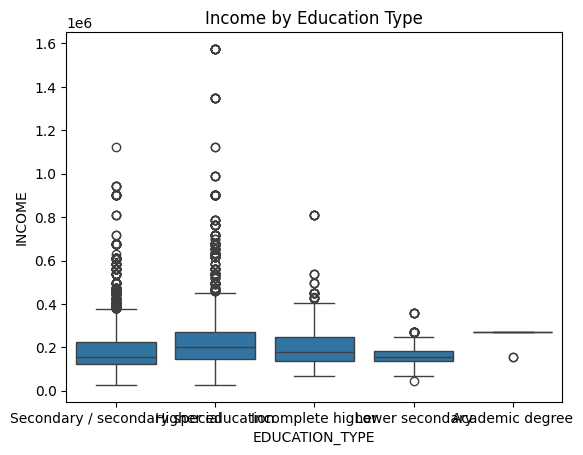

In [17]:
 #Compare INCOME by EDUCATION_TYPE
sns.boxplot(x='EDUCATION_TYPE', y='INCOME', data=df)
plt.title('Income by Education Type')
plt.show()

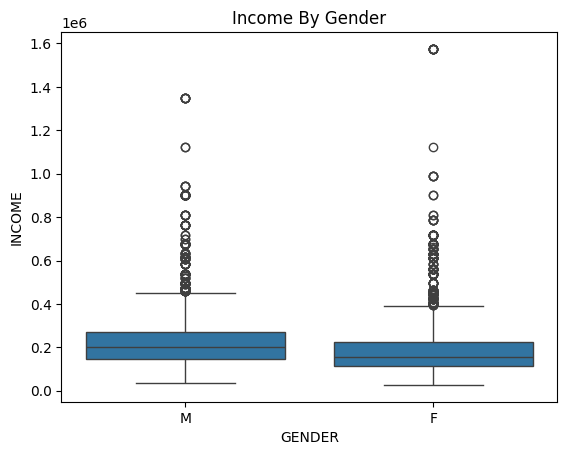

In [18]:
# Box plot: Compare INCOME by GENDER
sns.boxplot(x='GENDER', y='INCOME', data=df)
plt.title('Income By Gender')
plt.show()

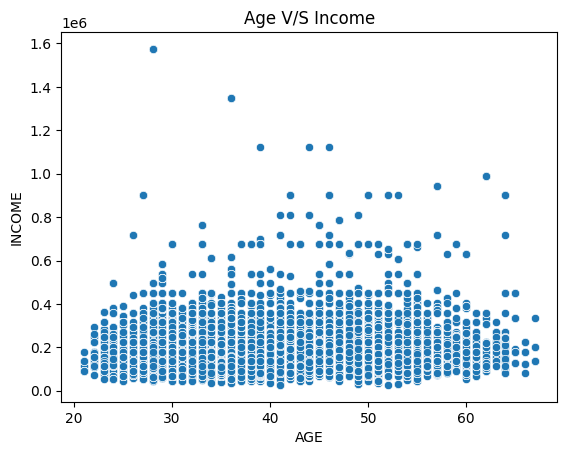

In [19]:
# Visualize the relationship between AGE and INCOME
sns.scatterplot(x='AGE', y='INCOME', data=df)
plt.title('Age V/S Income')
plt.show()

In [20]:
df.corr


<bound method DataFrame.corr of        Unnamed: 0       ID GENDER CAR REALITY  NO_OF_CHILD    INCOME  \
0               0  5008806      M   Y       Y            0  112500.0   
1               1  5008808      F   N       Y            0  270000.0   
2               2  5008809      F   N       Y            0  270000.0   
3               3  5008810      F   N       Y            0  270000.0   
4               4  5008811      F   N       Y            0  270000.0   
...           ...      ...    ...  ..     ...          ...       ...   
25129       25129  5149828      M   Y       Y            0  315000.0   
25130       25130  5149834      F   N       Y            0  157500.0   
25131       25131  5149838      F   N       Y            0  157500.0   
25132       25132  5150049      F   N       Y            0  283500.0   
25133       25133  5150337      M   N       Y            0  112500.0   

                INCOME_TYPE                 EDUCATION_TYPE  \
0                   Working  Secondary / 

Model Building
-

In [21]:
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [22]:
x = df.iloc[:,:-1]
x

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2


In [23]:
print(x.shape)

(25134, 19)


In [24]:
print(x.columns)

Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')


In [25]:
y = df['TARGET']
y

0        0
1        0
2        0
3        0
4        0
        ..
25129    1
25130    1
25131    1
25132    1
25133    1
Name: TARGET, Length: 25134, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [27]:
x_train

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
15757,15757,5095269,F,Y,Y,0,126000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,47,28,2
20397,20397,5118242,M,N,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,42,38,8
2826,2826,5023990,F,N,Y,1,157500.0,Working,Higher education,Married,House / apartment,1,0,0,0,3.0,9,30,6
11034,11034,5066561,F,N,N,0,180000.0,Commercial associate,Incomplete higher,Married,With parents,1,1,0,1,2.0,14,23,1
14618,14618,5090651,F,N,Y,1,315000.0,Working,Higher education,Civil marriage,House / apartment,1,1,0,1,3.0,20,30,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,21575,5132306,M,Y,Y,0,184500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,8,34,3
5390,5390,5036687,M,N,Y,1,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,3.0,9,30,8
860,860,5010320,M,N,N,0,135000.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,1,2.0,30,26,0
15795,15795,5095340,M,N,Y,0,135000.0,Working,Higher education,Married,House / apartment,1,0,0,0,2.0,4,55,1


In [28]:
y_train


15757    0
20397    0
2826     0
11034    0
14618    0
        ..
21575    0
5390     0
860      0
15795    0
23654    0
Name: TARGET, Length: 20107, dtype: int64

In [29]:
x_test

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED
423,423,5009490,M,Y,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,1,0,2.0,39,44,17
17192,17192,5104868,F,N,Y,0,112500.0,Working,Higher education,Married,House / apartment,1,0,0,0,2.0,54,33,11
20649,20649,5125206,F,N,Y,0,202500.0,Working,Incomplete higher,Single / not married,House / apartment,1,0,0,0,1.0,23,51,20
1598,1598,5021695,M,Y,Y,2,337500.0,Working,Incomplete higher,Married,House / apartment,1,0,1,0,4.0,18,34,5
11898,11898,5068267,F,Y,Y,0,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,1.0,14,44,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18219,18219,5113040,F,N,Y,0,229500.0,Working,Higher education,Widow,House / apartment,1,0,0,0,1.0,47,35,15
2445,2445,5023233,F,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,1,0,0,1.0,2,31,3
3375,3375,5024957,F,N,Y,2,173250.0,Working,Secondary / secondary special,Separated,House / apartment,1,0,0,0,3.0,16,36,15
2950,2950,5024250,F,N,N,0,247500.0,Working,Secondary / secondary special,Separated,House / apartment,1,0,0,0,1.0,38,54,4


In [30]:
y_test

423      0
17192    0
20649    0
1598     0
11898    0
        ..
18219    0
2445     0
3375     0
2950     0
14092    0
Name: TARGET, Length: 5027, dtype: int64

In [31]:
df['GENDER'].tolist()


['M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F'

In [32]:
pd.to_numeric()

TypeError: to_numeric() missing 1 required positional argument: 'arg'

In [ ]:
import pandas as pd

# Sample data
data = {'GENDER': ['Male', 'Female', 'Male'],
        'AGE': [25, 32, 40]}
df = pd.DataFrame(data)

# Identify the column with issues
print(df.dtypes)

# Handle categorical data
df = pd.get_dummies(df, columns=['GENDER'])

# Convert AGE to numeric (if necessary)
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

Feature Scaling
-

In [ ]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [ ]:
x_train_sc

In [ ]:
x_test_sc

In [ ]:
len(x_train_sc), len(x_test_sc)

Model Selection
-

In [ ]:
#on normal dateset
lr = LogisticRegression()
lr.fit(x_train, y_train)

In [ ]:
print(f'Traning Accuracy : {lr.score(x_train_sc, y_train)}')
print(f'Test Accuracy : {lr.score(x_test_sc, y_test)}')

In [ ]:
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(x_train, y_train)

In [ ]:
print(f'Traning Accuracy: {dt.score(x_train, y_train)}')
print(f'Test Accuracy : {dt.score(x_test, y_test)}')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit the encoder on the training labels
le.fit(y_train)

# Encode the training and testing labels
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Fit your XGBoost model with the encoded labels
xgb = XGBClassifier(gamma=0.5, reg_alpha=0.6, reg_lamba=0.3)
xgb.fit(x_train, y_train_encoded)

In [ ]:
y_pred_xgtr = xgb.predict(x_train)
y_pred_xgts = xgb.predict(x_test)

In [ ]:
x_train[:3]

In [ ]:
y_train[:3]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming y_train contains string labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_train_encoded, y_pred_xgtr)
print(confusion_matrix)

In [ ]:
# Set the figure size
sns.set(rc={"figure.figsize": (6, 5)})
sns.heatmap(confusion_matrix(y_train, y_pred_xgtr), annot= True, fmt='4g')